In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing

from gc import collect as collect_garbage
from psutil import virtual_memory
from os import scandir

In [2]:
%matplotlib widget

In [3]:
folder = "../../Deidentified-Raw-Waveforms/"
file1 = "raw_waves_data_2a.csv"
file2 = "raw_waves_data_2b.csv"
file3 = "raw_waves_data_2c.csv"
file4 = "raw_waves_data_2d.csv"
file5 = "raw_waves_data_2e.csv"
coldict = {
    "raw_waves_data_2a.csv": ["257", "258"], 
    "raw_waves_data_2b.csv": ["258"], 
    "raw_waves_data_2c.csv": ["257"], 
    "raw_waves_data_2d.csv": ["257", "258"], 
    "raw_waves_data_2e.csv": ["257", "258"]
}

In [4]:
# Okay, today, we are going to look at file 2a again. We'll just attempt to run XQRS on the signals individually and see what we get. We'll also Zoom into problem areas
# (spikes) and make a choice as to if we need to remove those spikes or not.
collect_garbage()
virtual_memory()

svmem(total=12655771648, available=6290165760, percent=50.3, used=6365605888, free=6290165760)

In [5]:
rpeaks = []

In [6]:
# First, we will read in the ECG data from file 2a
df = pd.read_csv(folder + file1, usecols=coldict[file1])

In [35]:
print(len(df["258"]))

64791747


In [40]:
signal = df.loc[0000000:5000000, "258"]

In [41]:
freq = 250

In [42]:
# Now, we've already seen what happens when we run XQRS on signal 258: It does a good job of finding R peaks before the missing signal, but fails afterwards. Let's see it again
# for completeness sake, and also to test the speed of XQRS
xqrs = processing.XQRS(sig=signal, fs=freq)
xqrs.detect()

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


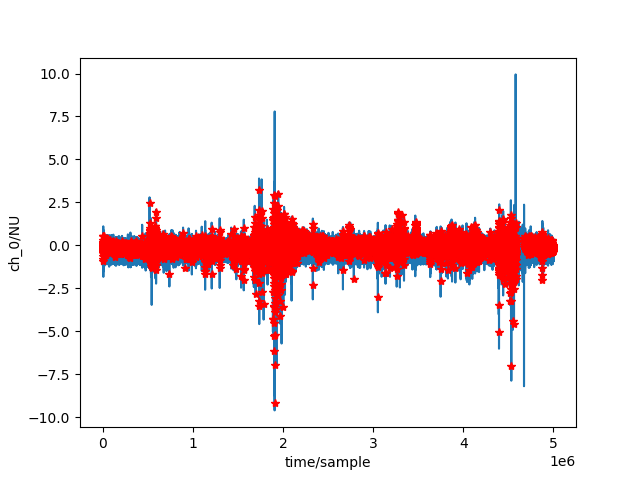

In [43]:
wfdb.plot_items(signal= np.array(signal).reshape( (len(signal), 1) ), ann_samp=[xqrs.qrs_inds] )

In [30]:
rpeaks.append(list(xqrs.qrs_inds))

In [44]:
# I have a plan on paper. Before I go ahead with that, I'm gonna see what happens if I combine the signals and run XQRS on a region that includes both signals
virtual_memory()

svmem(total=12655771648, available=2827296768, percent=77.7, used=9828474880, free=2827296768)

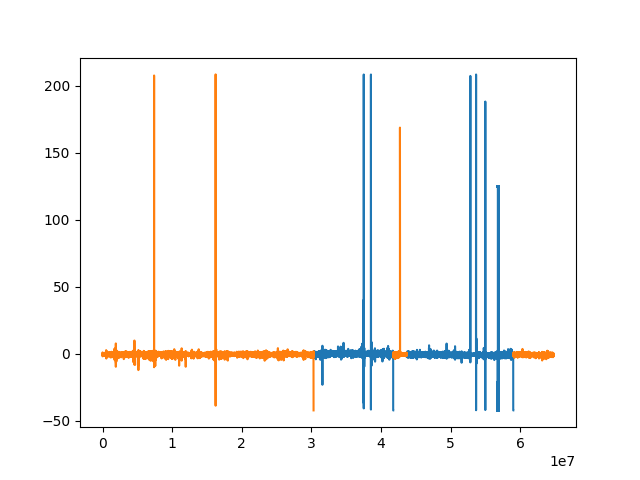

In [7]:
plt.plot(df["257"])
plt.plot(df["258"])
